<a href="https://colab.research.google.com/github/AnjanPayra/Opinion_Voter_Latane/blob/main/VoterModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import necessary libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random

## **Parameters for the Voter Model.**
This includes the size of the Lattice, the number epochs.

In [ ]:
L = 100 # length of side of the lattice
epochs = 50000 # number of epochs
stepSize = 1 # Used to display opinions after a certain epochs
np.random.seed(42) # Used to initialise the random number generator

## **Helper functions**

A helper function : this is used for visualizing the population of agents.

In [ ]:
num_opinions = L * L
cmap = plt.cm.viridis
norm = mcolors.Normalize(vmin=0, vmax=num_opinions - 1)

def plot_opinions(lattice, title="Voter Model"):
    plt.imshow(lattice, cmap=cmap, norm=norm)
    plt.colorbar(label="Opinion")
    plt.title(title)
    plt.grid(True, which='both', color='black', linestyle='-', linewidth=0.5)
    plt.xticks(np.arange(-0.5, L, 1), [])
    plt.yticks(np.arange(-0.5, L, 1), [])
    plt.gca().set_xticks(np.arange(-0.5, L, 1), minor=True)
    plt.gca().set_yticks(np.arange(-0.5, L, 1), minor=True)
    plt.grid(which="minor", color="black", linestyle='-', linewidth=0.5)
    for i in range(L):
      for j in range(L):
        plt.text(j, i, str(lattice[i, j]), ha='center', va='center', color='black', fontsize=6)
    plt.show()

A helper function: this is used to find the immediate neighbours for each agent.

In [ ]:
# Von Neuman Torus variant
def findNeighbours_torusVN(i, j):
    return [
        ((i + 1) % L, j),
        ((i - 1) % L, j),
        (i, (j + 1) % L),
        (i, (j - 1) % L),
    ]

In [ ]:
# Von Neuman Bounded variant
def findNeighbours_boundedVN(i, j):
    neighbors = []
    if i > 0:  # north
        neighbors.append((i - 1, j))
    if i < L - 1:  # south
        neighbors.append((i + 1, j))
    if j > 0:  # west
        neighbors.append((i, j - 1))
    if j < L - 1:  # east
        neighbors.append((i, j + 1))
    return neighbors

In [ ]:
def findNeighbours_torusM(i, j):
    neighbors = [
        ((i - 1) % L, j),
        ((i + 1) % L, j),
        (i, (j - 1) % L),
        (i, (j + 1) % L),
        ((i - 1) % L, (j + 1) % L),
        ((i - 1) % L, (j - 1) % L),
        ((i + 1) % L, (j + 1) % L),
        ((i + 1) % L, (j - 1) % L)
    ]
    return neighbors

In [ ]:
# Moore Bounded variant
def findNeighbours_boundedM(i, j):
    neighbors = []
    # Check all 8 positions in Moore neighborhood
    if i > 0:
        neighbors.append((i - 1, j))
    if i < L - 1:
        neighbors.append((i + 1, j))
    if j > 0:
        neighbors.append((i, j - 1))
    if j < L - 1:
        neighbors.append((i, j + 1))
    if i > 0 and j < L - 1:
        neighbors.append((i - 1, j + 1))
    if i > 0 and j > 0:
        neighbors.append((i - 1, j - 1))
    if i < L - 1 and j < L - 1:
        neighbors.append((i + 1, j + 1))
    if i < L - 1 and j > 0:
        neighbors.append((i + 1, j - 1))
    return neighbors

## **Defining the initial population of agents/entities and initializing it.**

In [ ]:
LAT = np.arange(L * L).reshape((L, L))

## **The Voter Model**

In [ ]:
countOpinions = []
unique_elements_count = len(np.unique(LAT))
countOpinions.append(unique_elements_count)
#plot_opinions(LAT, title=f"Initial Assignment of Opinions")
for run in range(epochs):
    # Sequentially update each cell in the lattice
    for i in range(L):
        for j in range(L):
            # Get the neighbors of the current cell
            neighbors = findNeighbours_boundedVN(i, j)
            # Randomly select one neighbor's opinion to adopt
            if neighbors:
                neigh_i, neigh_j = random.choice(neighbors)
                LAT[i, j] = LAT[neigh_i, neigh_j]  # Adopt the neighbor's opinion
    # Plot every 1000 iterations for visualization
    unique_elements_count = len(np.unique(LAT))
    countOpinions.append(unique_elements_count)
    #if (run+1) % stepSize == 0:
        #plot_opinions(LAT, title=f"Epoch {run+1}")
    if unique_elements_count == 1:
        print(f"Converged after {run+1} epochs. with count {unique_elements_count}")
        break

Converged after 20608 epochs. with count 1


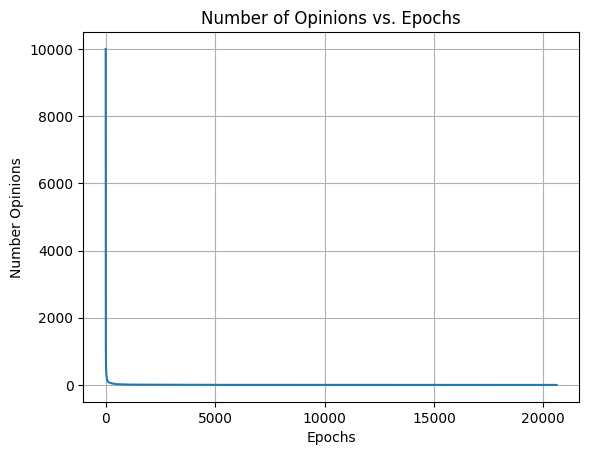

In [ ]:
epochs_range = range(len(countOpinions))

plt.plot(epochs_range, countOpinions)
plt.xlabel("Epochs")
plt.ylabel("Number Opinions")
plt.title("Number of Opinions vs. Epochs")

plt.grid(True)
plt.show()

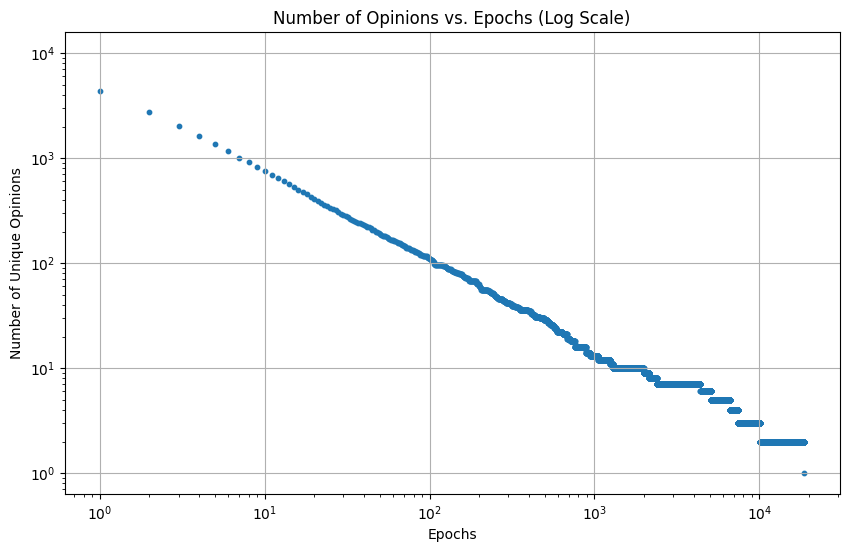

In [ ]:
epochs_range = range(len(countOpinions))

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.scatter(epochs_range, countOpinions, marker='o', s=10)  # Scatter plot
plt.xlabel("Epochs")
plt.ylabel("Number of Unique Opinions")
plt.title("Number of Opinions vs. Epochs (Log Scale)")
plt.grid(True)

# Set the x and y axes to log scale
plt.xscale("log")
plt.yscale("log")

plt.show()

8.137498014707665


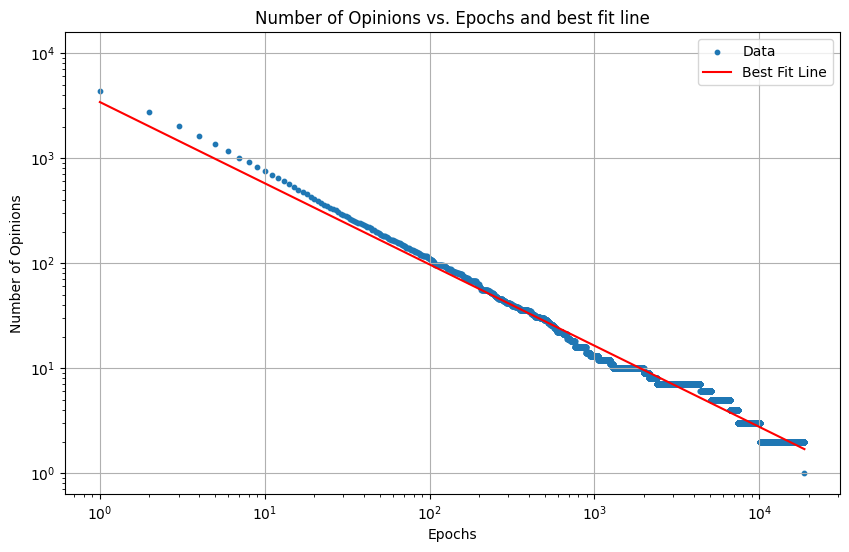

In [ ]:
# Convert to NumPy arrays
epochs_range_np = np.array(epochs_range)
countOpinions_np = np.array(countOpinions)

# --- Calculate Best-Fit Line (in log space) ---
log_epochs = np.log(epochs_range_np[1:])  # Avoid log(0)
log_opinions = np.log(countOpinions_np[1:])  # Avoid log(0)

slope, intercept = np.polyfit(log_epochs, log_opinions, 1)
print(intercept)
best_fit_line_log = slope * log_epochs + intercept
best_fit_line = np.exp(best_fit_line_log)
# --- End of Best-Fit Line Calculation ---

# --- Plotting ---
plt.figure(figsize=(10, 6))
plt.scatter(epochs_range, countOpinions, marker='o', s=10, label='Data')  # Scatter plot
plt.plot(epochs_range_np[1:], best_fit_line, color='red', label='Best Fit Line') # Best-fit line

plt.xlabel("Epochs")
plt.ylabel("Number of Opinions")
plt.title("Number of Opinions vs. Epochs and best fit line")
plt.xscale("log")
plt.yscale("log")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
slopes = np.diff(countOpinions) / np.diff(epochs_range)
print(slopes[-1])

-1.0


In [ ]:
slope, intercept = np.polyfit(log_epochs, log_opinions, 1)

# Convert the intercept back to the original scale
original_intercept = np.exp(intercept)

print("Intercept of the best-fit line:", original_intercept)

Intercept of the best-fit line: 5078.740224835718
